1. Seleksi Unvariate


In [30]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
# memuat data
data = pd.read_csv("riceClassification.csv")
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [32]:
print(data.dtypes)

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object


In [33]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [34]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [35]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
0                id  3.603372e+07
5        ConvexArea  3.763773e+06
1              Area  3.709518e+06
3   MinorAxisLength  2.592590e+04
8         Perimeter  1.279955e+04
6     EquivDiameter  1.241799e+04
11            Class  8.200000e+03
10     AspectRation  9.169715e+02
2   MajorAxisLength  4.008201e+02
9         Roundness  8.050321e+01


2. Feature Importance

In [36]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [37]:
# memuat data
data = pd.read_csv("riceClassification.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [38]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09643365 0.04444143 0.00520397 0.12556711 0.0574294  0.03358954
 0.0362937  0.0106574  0.00706194 0.04217474 0.08160318 0.45954394]


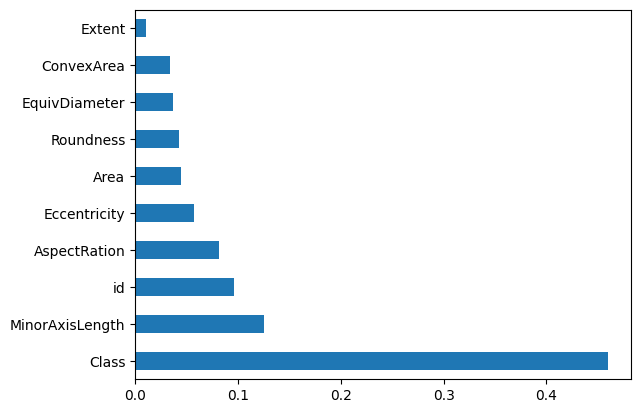

In [39]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

3. Matriks Korelasi dengan Heatmap

In [40]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
# memuat data
data = pd.read_csv("riceClassification.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [42]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

Matriks Korelasi dengan Heatmap (lanjutan)

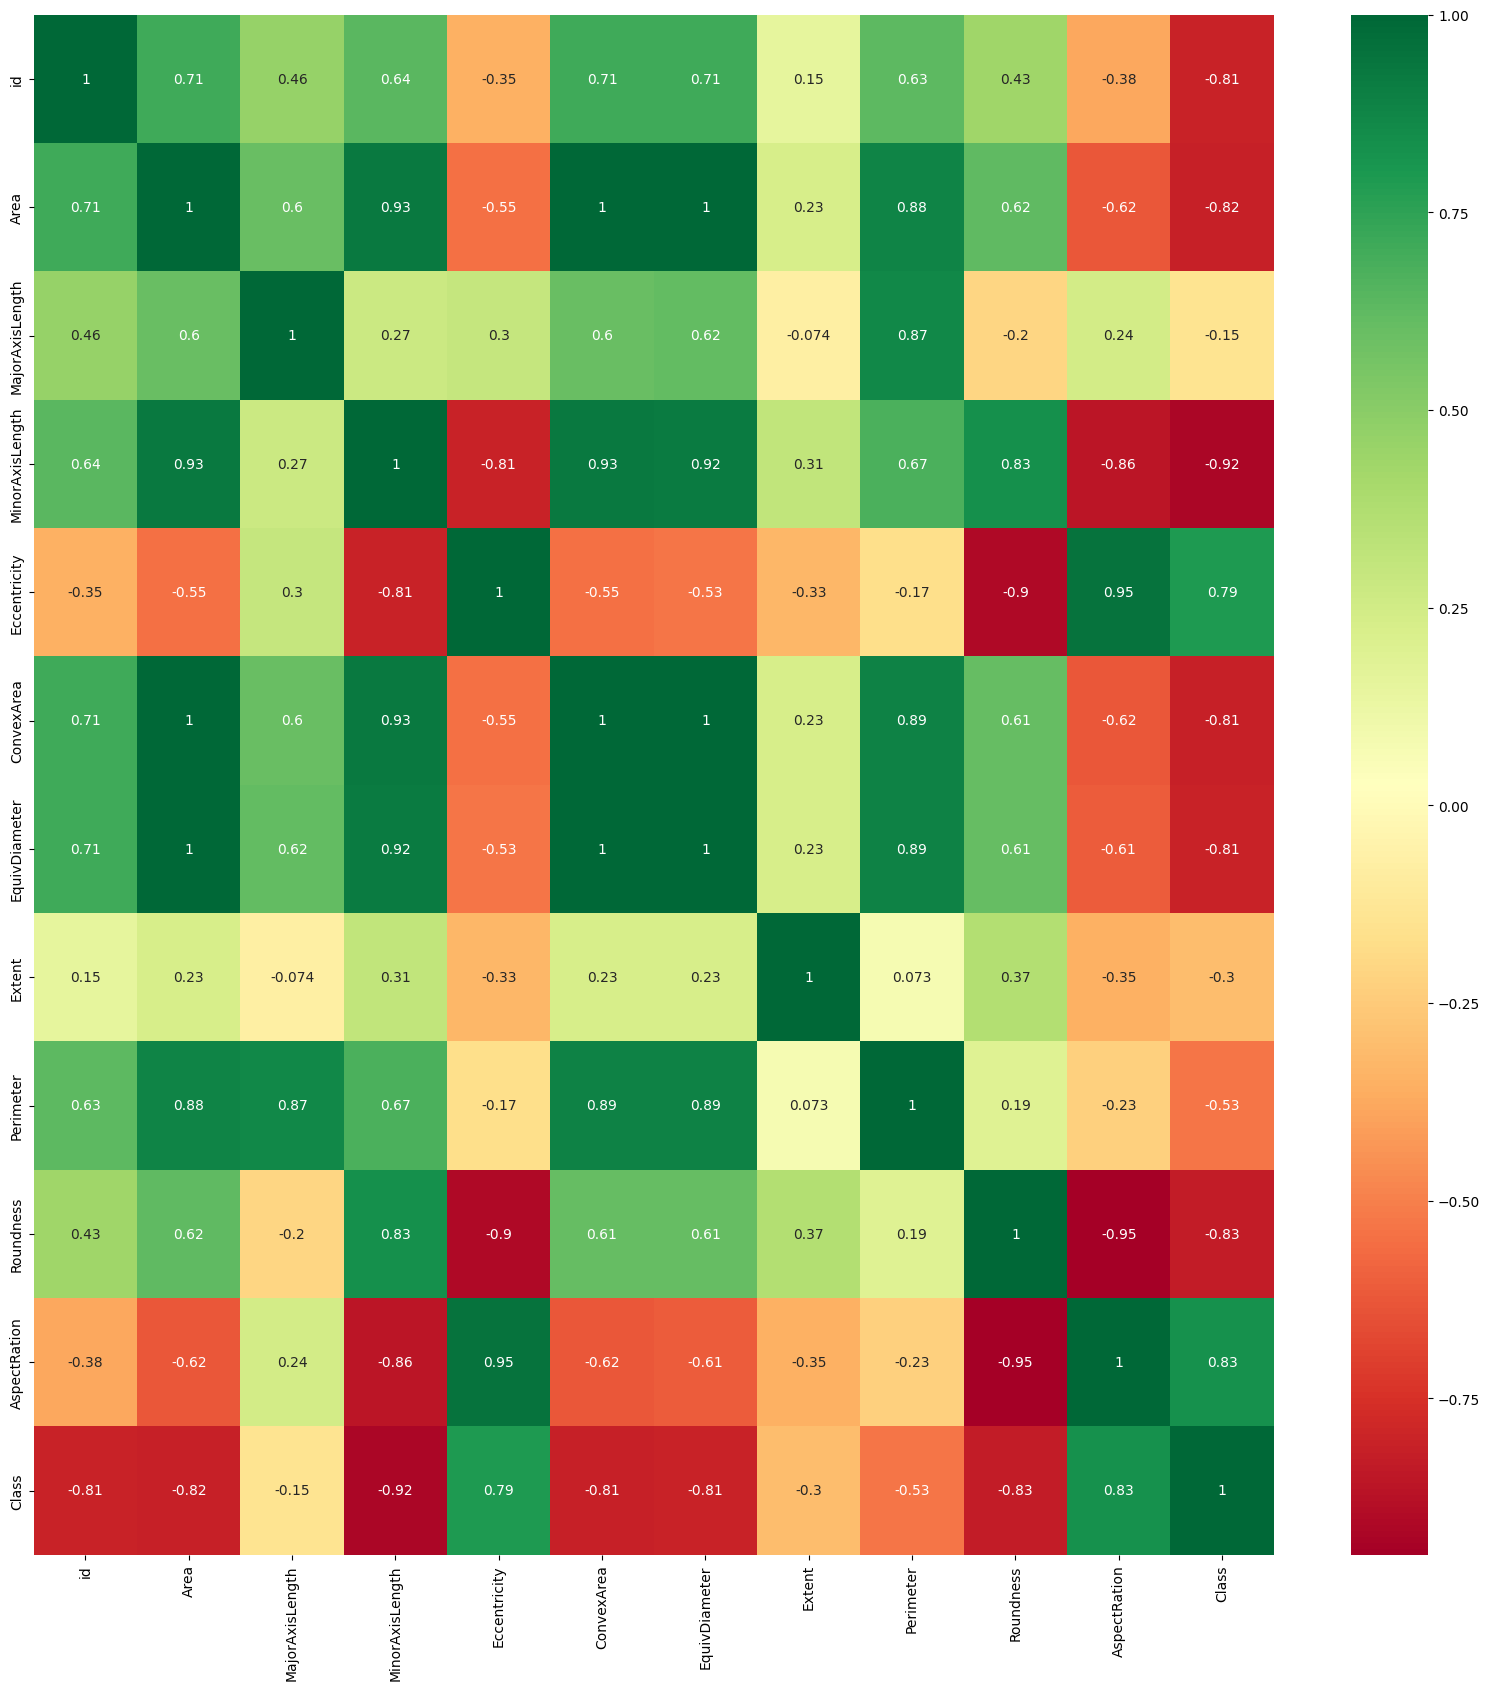

In [43]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Kesimpulan
Korelasi Kuat dengan Class:

Variabel "eccentricity" memiliki korelasi yang kuat dengan variabel "class." Korelasi positif yang kuat antara "eccentricity" dan "class" menunjukkan bahwa semakin tinggi nilai eccentricity, semakin besar kemungkinan suatu observasi masuk ke dalam kelas tertentu dalam dataset. Variabel "aspectration" juga memiliki korelasi yang kuat dengan "class," meskipun tidak sekuat "eccentricity." Korelasi positif antara "aspectration" dan "class" menunjukkan bahwa ada hubungan positif antara aspek rasio dan kelas.

Korelasi Lemah dengan Class:

Variabel "id" dan "minoraxislength" memiliki korelasi yang lemah dengan "class." Korelasi yang lemah menunjukkan bahwa variabel-variabel ini mungkin tidak memiliki pengaruh yang signifikan terhadap kelas atau label dalam dataset. Artinya, nilai "id" atau "minoraxislength" tidak memberikan informasi yang kuat untuk membedakan antara kelas yang berbeda.

